# Real Estate Sales in Melbourne
### The notebook of this project is an analysis of the database of real estate sales in Melbourne from 2016 to 2017. The features of the dataset includes Address, Type of Real Estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale, Distance from CBD, Land Size, Building Size and Number of Properties that exist in each suburb. The amount of data in this database has certain limitations, with less data available for the first quarter of 2016 and the fourth quarter of 2017. Despite the limitations above, other data volumes are very detailed and easy to analyze.
### For most stakeholders, the main concern is the price, so my first point is mainly to analyze which features will affect the housing price. 
Types: Unit,House and Townhouse.
* The price distribution of different types of housing.

location: With regions and suburbs.
* The price distribution of different location.

Rooms: With number of bedrooms,bathrooms and carports.
* The price distribution of number of rooms.


According to the data, I predict that the house price is mainly affected by the type of property. House is the most expensive, townhouse is the second, and unit is the cheapest. Secondly, in the case of the same type of house, the suburb where the house is located is a key factor in determining the property price. Finally, when the conditions of the first two features are the same, what determines the real estate price is the number of houses.

### Secondly, I will further summarize the real estate in Melbourne from 2016 to 2017.
* Which types of property have sold the most?
* Which sales method is easy to make deal？
* Which month sold the most in 2016 or 2017?
* Top 10 suburbs with highest sales.
* The correlation between built year and property price
* The correlation between land size and property price.

In [1]:
#import packages
import pandas as pd  
import numpy as np
import datetime
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

## Data preprocessing

In [4]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [5]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Sold_year'] = pd.DatetimeIndex(df['Date']).year
df['Sold_month'] = pd.DatetimeIndex(df['Date']).month
df.drop(columns = ['Date'], inplace = True)
df.head()

/Users/DanYang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/DanYang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '14/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/DanYang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/Users/DanYang/opt/anaconda3/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '16

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_year,Sold_month
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,2.0,...,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,3
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,2.0,...,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,2016,4
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,3.0,...,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,2017,4
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,3.0,...,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,2017,4
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,3.0,...,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2016,4


<AxesSubplot:xlabel='Car', ylabel='Count'>

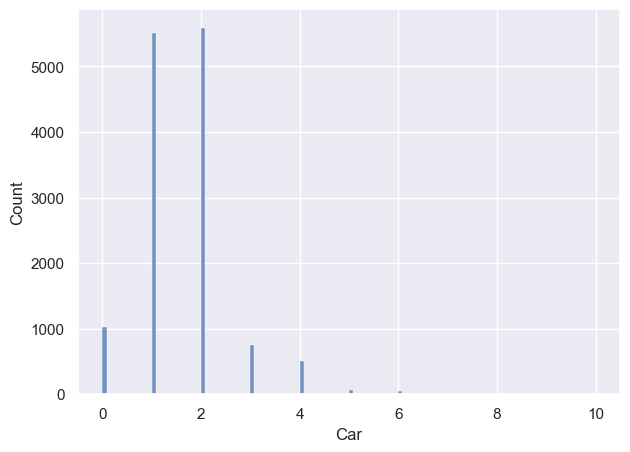

In [7]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(figsize=(7,5))
sns.histplot(df['Car'])

In [8]:
df[(df['Car'].isna())& (df['Type']=='h')]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_year,Sold_month
12221,Ascot Vale,132 The Parade,3,h,985000.0,S,Brad,4.3,3032.0,3.0,...,245.0,91.0,1945.0,NaN,-37.77215,144.91144,Western Metropolitan,6567.0,2017,3
12247,Brunswick East,18 Ethel St,2,h,1023000.0,S,Domain,4.0,3057.0,2.0,...,154.0,76.0,1890.0,NaN,-37.77221,144.97537,Northern Metropolitan,5533.0,2017,3
12259,Clifton Hill,34 Fenwick St,3,h,1436000.0,S,Jellis,3.6,3068.0,3.0,...,123.0,128.0,1990.0,NaN,-37.78888,145.00036,Northern Metropolitan,2954.0,2017,3
12320,Glen Waverley,19 Diamond Av,3,h,1370000.0,S,Fletchers,16.7,3150.0,3.0,...,652.0,NaN,NaN,NaN,-37.87170,145.17267,Eastern Metropolitan,15321.0,2017,3
12362,Newport,11 Collingwood Rd,4,h,1180000.0,PI,Williams,6.2,3015.0,4.0,...,545.0,NaN,NaN,NaN,-37.84399,144.89125,Western Metropolitan,5498.0,2017,3
12383,Port Melbourne,333 Princes St,3,h,1764000.0,S,Buxton,3.5,3207.0,3.0,...,131.0,133.0,1900.0,NaN,-37.83509,144.94224,Southern Metropolitan,8648.0,2017,3
12397,South Melbourne,303 Park St,2,h,1137000.0,S,hockingstuart,1.9,3205.0,2.0,...,126.0,79.0,NaN,NaN,-37.83704,144.95606,Southern Metropolitan,5943.0,2017,3
12426,Yarraville,54 Sussex St,3,h,890000.0,VB,Jas,6.3,3013.0,3.0,...,338.0,123.0,1906.0,NaN,-37.81950,144.88908,Western Metropolitan,6543.0,2017,3
12462,Carlton,81 Princes St,2,h,800000.0,VB,Woodards,1.6,3053.0,2.0,...,117.0,NaN,NaN,NaN,-37.79294,144.97283,Northern Metropolitan,6786.0,2017,9
12463,Carlton North,782 Lygon St,2,h,1065000.0,S,Nelson,3.5,3054.0,2.0,...,4025.0,NaN,NaN,NaN,-37.78791,144.96938,Northern Metropolitan,3106.0,2017,9


### Usually, unit has no parking space, so I choose 0 to fill null, while the parking space of house can be 1 or 2 without affecting data analysis, so I choose 1 to fill .

In [24]:
df.loc[(df['Car'].isna())& (df['Type']=='h'),'Car']= 1
df.loc[(df['Car'].isna())& (df['Type']=='u'),'Car']= 0

### Suburb and CouncilArea correspond one to one, so I create a dictionary to fill unknown CouncilArea with known relation.

In [12]:
pd.set_option('display.max_rows',500)
df_Suburb = df.groupby(['Suburb','CouncilArea'])['Address'].count().reset_index(name='count')

In [13]:
dict_Suburb = dict([(i,[x]) for i, x in zip(df_Suburb.Suburb,df_Suburb.CouncilArea)])
dict_Suburb

{'Abbotsford': ['Yarra'],
 'Aberfeldie': ['Moonee Valley'],
 'Airport West': ['Moonee Valley'],
 'Albanvale': ['Brimbank'],
 'Albert Park': ['Port Phillip'],
 'Albion': ['Brimbank'],
 'Alphington': ['Yarra'],
 'Altona': ['Hobsons Bay'],
 'Altona Meadows': ['Hobsons Bay'],
 'Altona North': ['Hobsons Bay'],
 'Ardeer': ['Brimbank'],
 'Armadale': ['Stonnington'],
 'Ascot Vale': ['Moonee Valley'],
 'Ashburton': ['Boroondara'],
 'Ashwood': ['Monash'],
 'Aspendale': ['Kingston'],
 'Aspendale Gardens': ['Kingston'],
 'Avondale Heights': ['Moonee Valley'],
 'Bacchus Marsh': ['Moorabool'],
 'Balaclava': ['Port Phillip'],
 'Balwyn': ['Boroondara'],
 'Balwyn North': ['Boroondara'],
 'Bayswater': ['Knox'],
 'Bayswater North': ['Maroondah'],
 'Beaconsfield': ['Cardinia'],
 'Beaconsfield Upper': ['Cardinia'],
 'Beaumaris': ['Bayside'],
 'Bellfield': ['Banyule'],
 'Bentleigh': ['Glen Eira'],
 'Bentleigh East': ['Glen Eira'],
 'Berwick': ['Casey'],
 'Black Rock': ['Bayside'],
 'Blackburn': ['Whitehorse

In [14]:
def isNaN(string):
    return string != string
for r, row in enumerate (df['CouncilArea'].values):
    if isNaN(row) and df['Suburb'][r] in dict_Suburb :
        df['CouncilArea'][r] = dict_Suburb[df['Suburb'][r]]

/var/folders/77/cr3w0dnx3ld3wl3dh7zz4p_r0000gn/T/ipykernel_7882/2512298341.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CouncilArea'][r] = dict_Suburb[df['Suburb'][r]]


### After filling the Car and CouncilArea, I chose unknown to fill the remaining null because we didn't have any more relevant data.

In [28]:
df.fillna('unknown', inplace=True)
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
Sold_year        0
Sold_month       0
dtype: int64

# Data Analytics

## Price analysis

### price distribution

<AxesSubplot:xlabel='Price', ylabel='Count'>

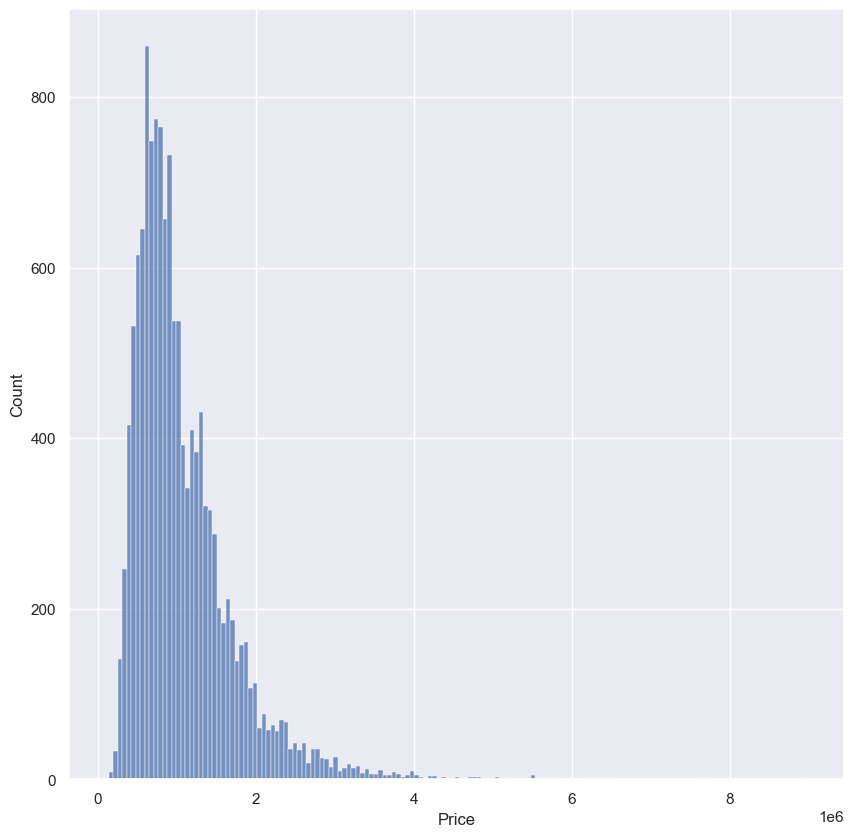

In [15]:
fig, axs = plt.subplots(figsize=(10,10))
sns.histplot(df['Price'])

### It can be seen from the figure above that there are few values greater than 3000000, so we cleared outlier selection for analysis of values less than 3000000.

In [17]:
# outlier 221 rows
df.loc[df['Price']>3000000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Sold_year,Sold_month
102,Albert Park,97 Page St,3,h,3010000.0,S,Greg,3.3,3206.0,3.0,...,147.0,146.0000,1890.0,Port Phillip,-37.84730,144.95510,Southern Metropolitan,3280.0,2017,3
108,Albert Park,115 Page St,4,h,4735000.0,S,Marshall,3.3,3206.0,4.0,...,330.0,207.0000,1910.0,Port Phillip,-37.84770,144.95580,Southern Metropolitan,3280.0,2017,2
112,Albert Park,22 Greig St,3,h,3755000.0,S,Greg,3.3,3206.0,3.0,...,325.0,NaN,NaN,Port Phillip,-37.84130,144.95000,Southern Metropolitan,3280.0,2016,7
233,Armadale,11/17 Myamyn St,2,u,3625000.0,S,Jellis,6.3,3143.0,3.0,...,0.0,NaN,2006.0,Stonnington,-37.85550,145.02910,Southern Metropolitan,4836.0,2016,4
251,Armadale,367 Dandenong Rd,6,h,5525000.0,S,Marshall,6.3,3143.0,5.0,...,1491.0,516.0000,1935.0,Stonnington,-37.86020,145.01300,Southern Metropolitan,4836.0,2016,9
270,Armadale,61 Union St,4,h,3660000.0,S,Jellis,6.3,3143.0,4.0,...,421.0,NaN,NaN,Stonnington,-37.85930,145.02750,Southern Metropolitan,4836.0,2017,2
272,Armadale,44 Denbigh Rd,4,h,3625000.0,S,Jellis,6.3,3143.0,4.0,...,709.0,251.0000,1900.0,Stonnington,-37.85740,145.01600,Southern Metropolitan,4836.0,2016,11
273,Armadale,44 Hampden Rd,4,h,4200000.0,VB,Kay,6.3,3143.0,4.0,...,563.0,333.0000,2000.0,Stonnington,-37.85820,145.01380,Southern Metropolitan,4836.0,2016,11
275,Armadale,4 Mercer Rd,3,h,3512500.0,S,Marshall,6.3,3143.0,3.0,...,617.0,285.0000,1998.0,Stonnington,-37.85570,145.02640,Southern Metropolitan,4836.0,2016,11
388,Ashburton,29A Yuile St,5,h,3510000.0,S,Jellis,11.0,3147.0,5.0,...,755.0,444.0000,2015.0,Boroondara,-37.85980,145.07960,Southern Metropolitan,3052.0,2017,3


<AxesSubplot:xlabel='Price', ylabel='Count'>

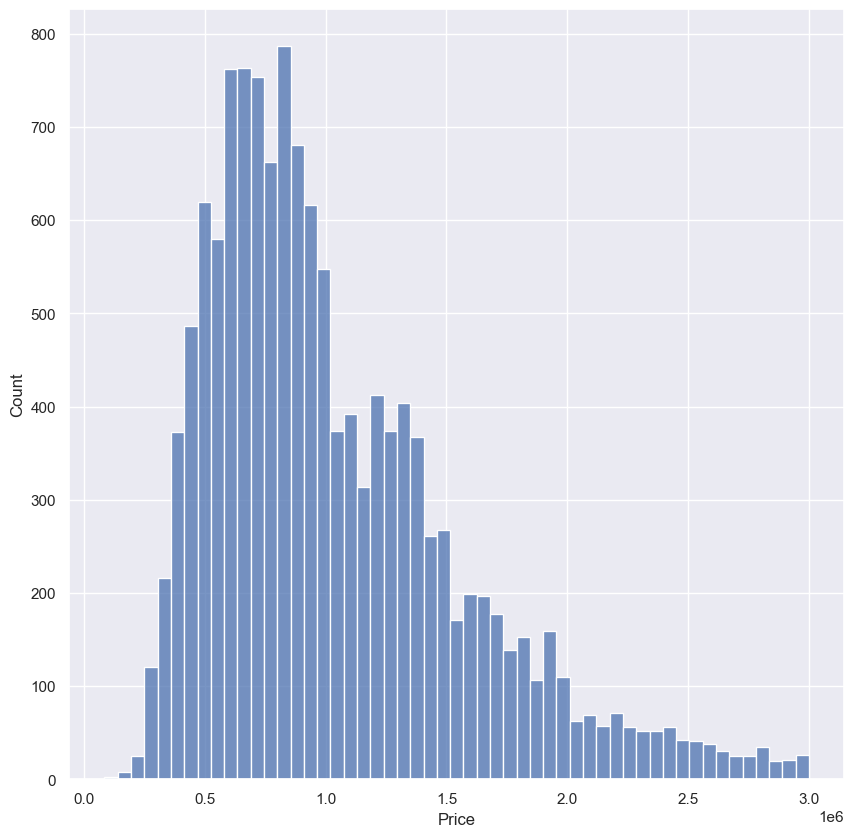

In [29]:
df_price = df.loc[df['Price'] <= 3000000]
fig, axs = plt.subplots(figsize=(10,10))
sns.histplot(df_price['Price'])



## The price distribution of different types of housing.

### Types: Unit,House and Townhouse.

In [19]:
df_house=df_price[df_price['Type']=='h']
df_house['Price'].median()

1060000.0

In [20]:
df_townhouse=df_price[df_price['Type']=='t']
df_townhouse['Price'].median()

845500.0

In [21]:
df_unit=df_price[df_price['Type']=='u']
df_unit['Price'].median()

560000.0

<AxesSubplot:xlabel='Price', ylabel='Count'>

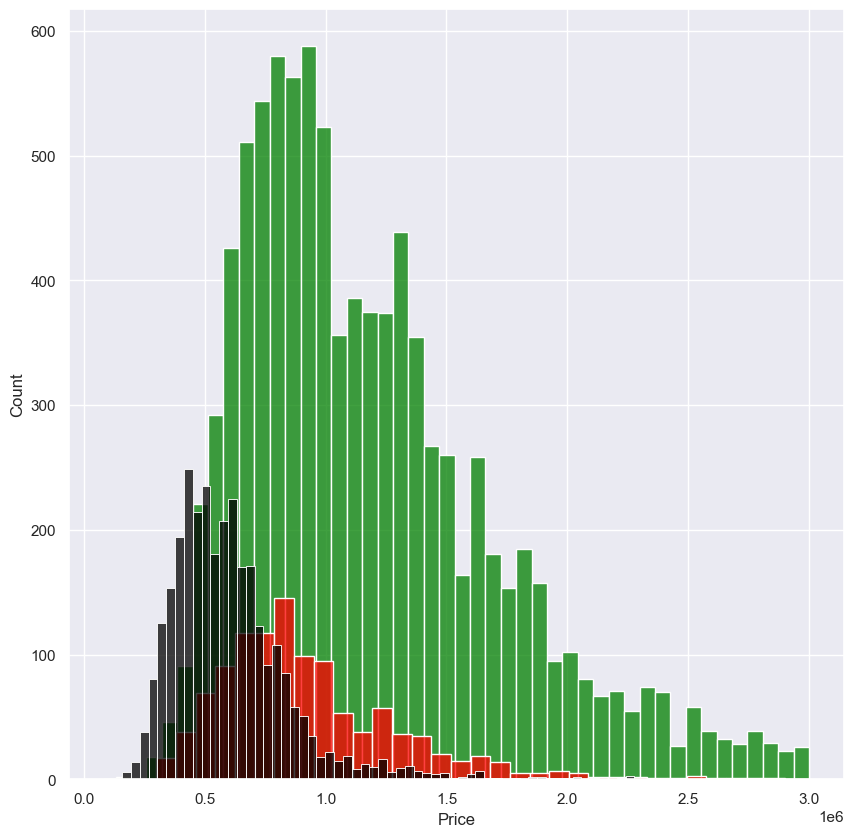

In [22]:
fig, axs = plt.subplots(figsize=(10,10))
sns.histplot(df_house['Price'],color = 'green')
sns.histplot(df_townhouse['Price'],color= 'red')
sns.histplot(df_unit['Price'],color = 'black')

### According to the above data, it can be seen that the housing type is the key feature affecting the housing price. From the median, it can be concluded that house is the most expensive, townhouse is the second,  and unit is the cheapest.




## The price distribution of different location.

### Region and price:

In [26]:
# number of Region  
df['Regionname'].nunique()

8

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Northern Metropolitan'),
  Text(1, 0, 'Western Metropolitan'),
  Text(2, 0, 'Southern Metropolitan'),
  Text(3, 0, 'Eastern Metropolitan'),
  Text(4, 0, 'South-Eastern Metropolitan'),
  Text(5, 0, 'Eastern Victoria'),
  Text(6, 0, 'Northern Victoria'),
  Text(7, 0, 'Western Victoria')])

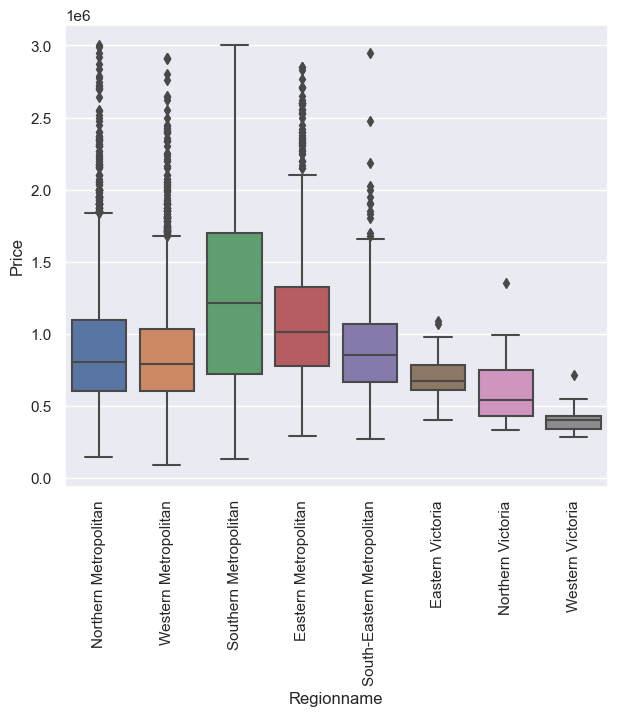

In [27]:
df_price = df.loc[df['Price'] <= 3000000]
fig, axs = plt.subplots(figsize=(7, 6))
sns.boxplot(x="Regionname", y="Price", data=df_price)
plt.xticks(rotation = 90)

###    According to the boxplot above, it can be seen that the region where the house is located will affect the housing price. Among the eight regions, the house price of Southern Metropolitan is the highest, and that of Eastern Metropolitan is the second. Western Victoria is the least expensive area.


### Next, I selected the region Southern Metropolitan with the highest price and the largest quantity to analyze the relationship between price and suburb.

### Suburb and price:

In [30]:
df[(df['Regionname']=='Southern Metropolitan')].groupby('Suburb')['Address'].count().sort_values(ascending=False)

Suburb
Bentleigh East     249
South Yarra        202
Glen Iris          195
Hawthorn           191
Brighton           186
Kew                177
Balwyn North       171
St Kilda           162
Port Melbourne     153
Carnegie           146
Bentleigh          139
Brighton East      138
Camberwell         132
Elwood             131
Hampton            130
Surrey Hills       125
Prahran            123
Hawthorn East      119
Malvern East       117
Balwyn             107
Toorak             100
Armadale            95
South Melbourne     85
Burwood             84
Ormond              83
Murrumbeena         82
Albert Park         69
Malvern             67
Moorabbin           64
Elsternwick         61
Ashburton           60
Windsor             60
Canterbury          54
Kew East            49
Oakleigh            47
Caulfield South     47
Cheltenham          46
Ashwood             46
Southbank           41
Caulfield North     35
Hughesdale          35
Chadstone           35
Middle Park         34
Bala

# ？？找不到合适的图来看suburb和price的关系！！
# ？？以及distance和price的关系！！







# ？？


## The price distribution of number of rooms.
### In order to analyze the relationship between price and rooms, I selected Bentleigh East suburb with the highest sales volume in the Southern Metropolitan region.

In [31]:
df_ben = df[(df['Suburb']=='Bentleigh East')]
df_ben['Rooms'].unique()

array([2, 3, 1, 5, 4])

In [32]:
df_ben.groupby('Rooms')['Address'].count().reset_index(name='count')

,Rooms,count
0,1,3
1,2,36
2,3,139
3,4,62
4,5,9


<AxesSubplot:xlabel='Rooms', ylabel='Price'>

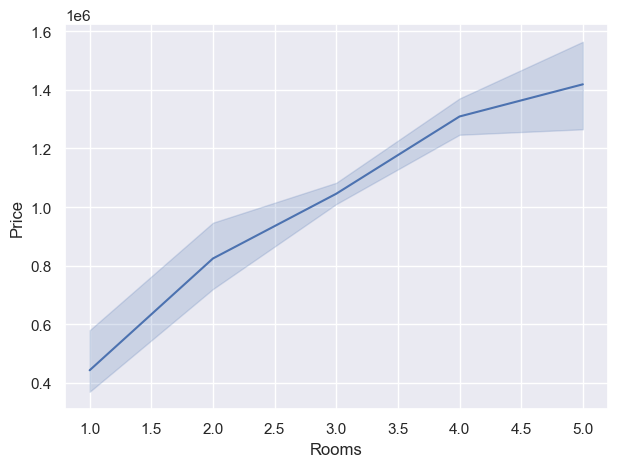

In [33]:
fig, axs = plt.subplots(figsize=(7, 5))
sns.lineplot(x="Rooms", y="Price", data=df_ben)

## According to the lineplot above, we can see that the number of rooms is positively correlated, and the higher the number of rooms, the higher the price.


## So next, we will analyze the relationship between Price and the number of bedrooms,bathrooms and carports.

<AxesSubplot:xlabel='Car', ylabel='Price'>

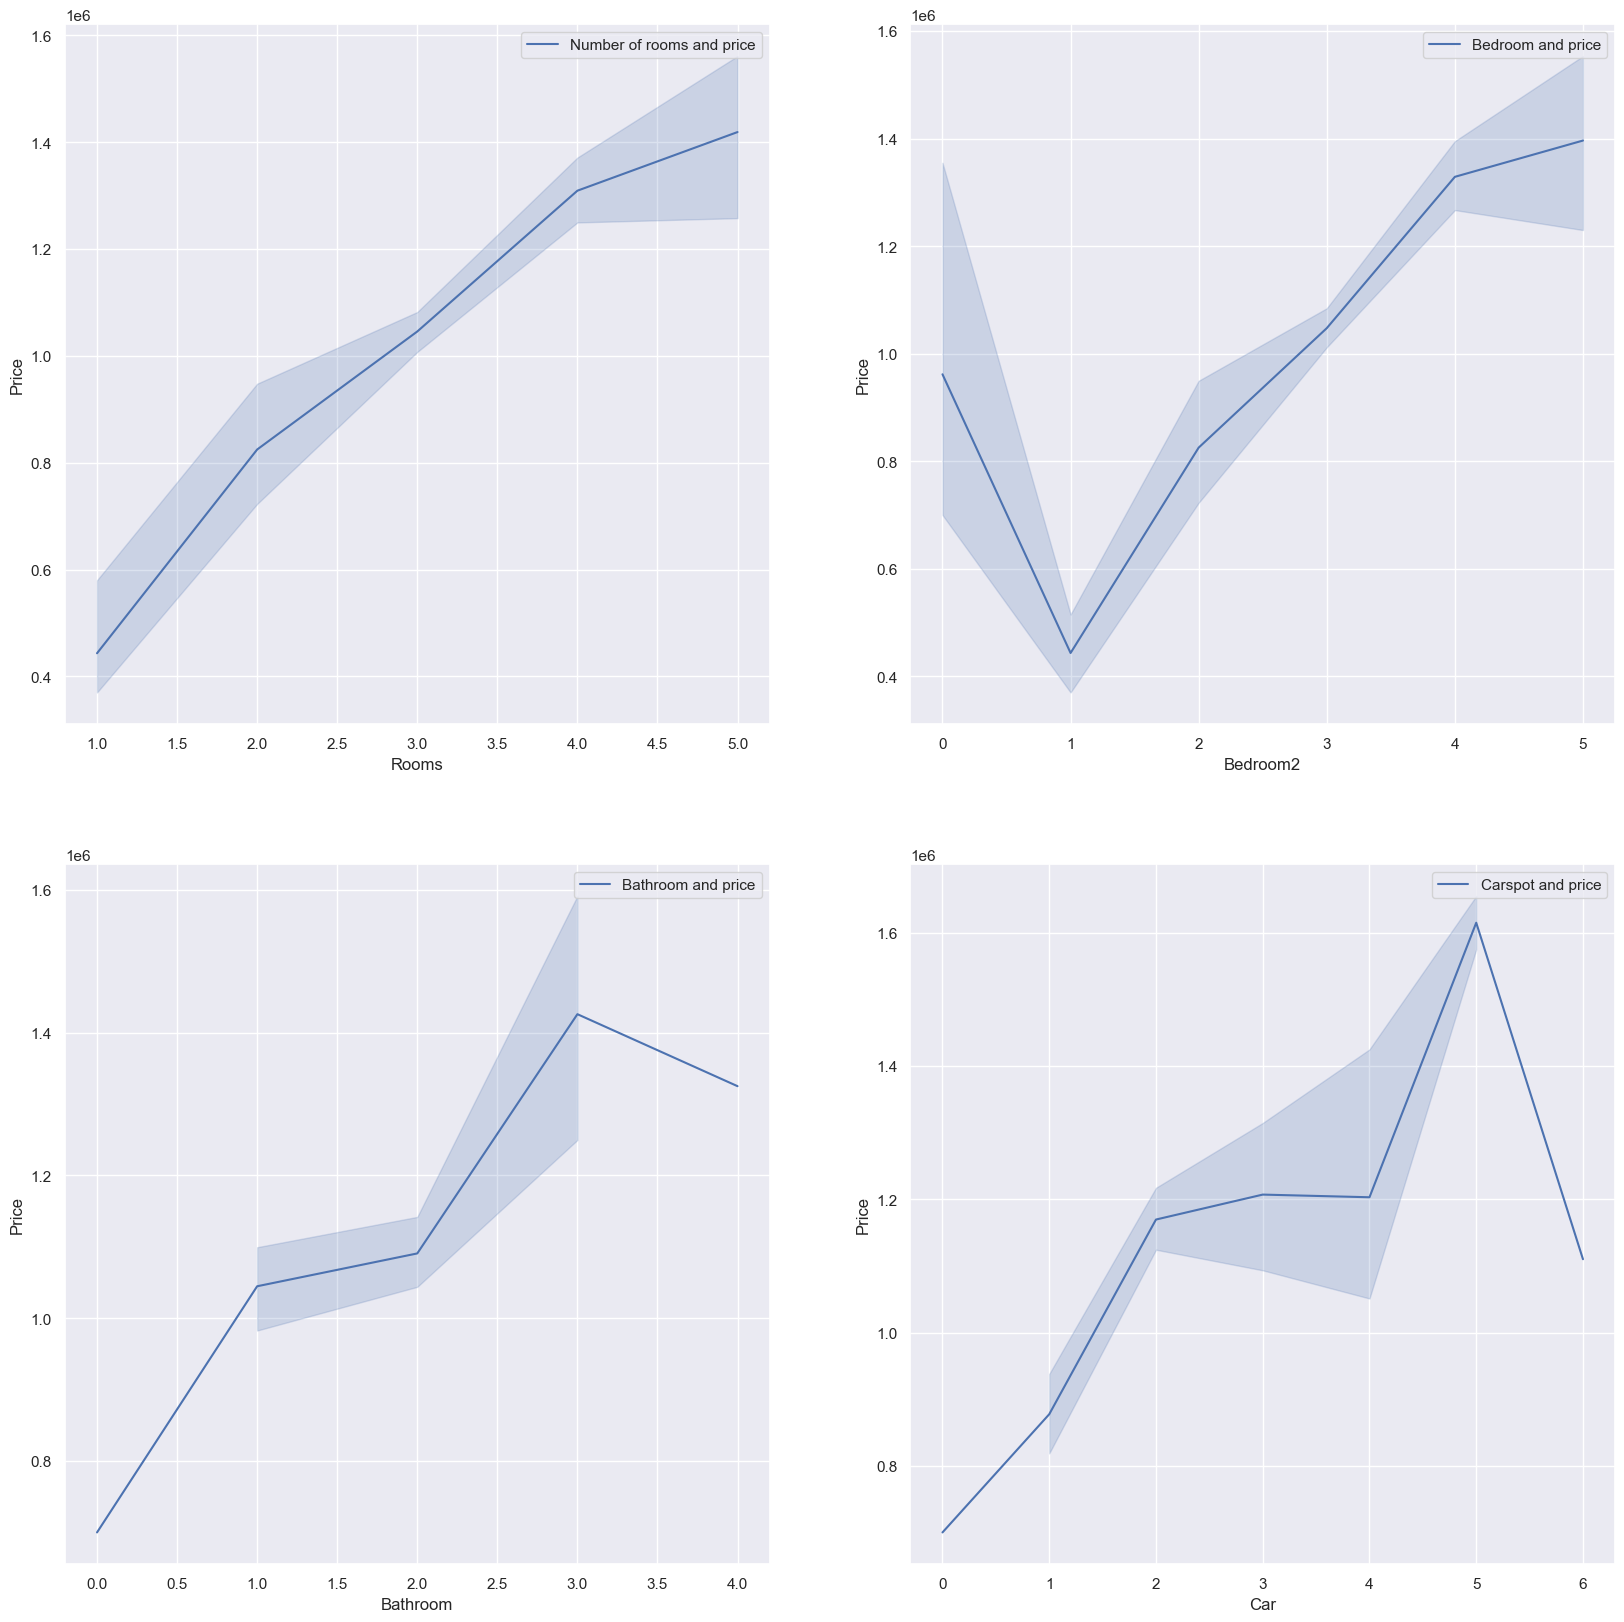

In [34]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
sns.lineplot(x="Rooms", y="Price", data=df_ben, label ='Number of rooms and price',ax = axs[0][0])
sns.lineplot(x="Bedroom2", y="Price", data=df_ben,label ='Bedroom and price',ax = axs[0][1])
sns.lineplot(x="Bathroom", y="Price", data=df_ben,label ='Bathroom and price',ax = axs[1][0])
sns.lineplot(x="Car", y="Price", data=df_ben,label ='Carspot and price',ax = axs[1][1])

## From the figure above, we can see that there is no significant relationship between the number of bedrooms,bathrooms and carports and price. The price is mainly determined by the total number of rooms rather than the number of specific rooms.

# Next, I will further summarize the real estate in Melbourne from 2016 to 2017.